In [3]:
from IPython import display

In [4]:
import packerlabimaging as pkg

This notebook demonstrates a basic workflow of using the packerlabimaging package. 

The fundamental types of imaging trials accepted for this workflow are: 
 - 2photon imaging
 - All Optical Experiment (2photon imaging + optogenetic stimulation)
 - Suite2p processing results output

This tutorial is based off an existing 2photon experiment that includes various trials of 2photon imaging and All optical experiments:

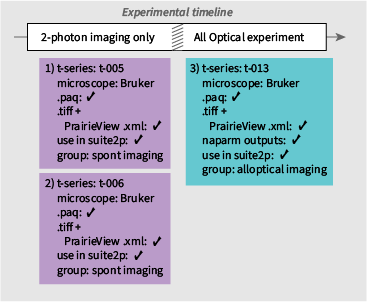

In [12]:
display.Image("/home/pshah/Documents/code/packerlabimaging/files/packerlabimaging-tutorial-exp-outline.png")

![example experiment setup for package pipeline] (packerlabimaging/files/packerlabimaging-tutorial-exp-outline.png "title")

### INITIALIZING ALLOPTICAL + TWOPHOTON IMAGING EXPERIMENT OBJECT FROM SCRATCH



In [ ]:
# experiment dictionary
initialization_dict = {
    'dataPath': '/home/pshah/mnt/qnap/Data/2020-12-19',
    'analysisSavePath': '/home/pshah/Documents/code/packerlabimaging/tests/',
    'microscope': "Bruker",
    "expID": 'RL109',
    'date': '2020-12-19',
    'comments': 'testing out analysis workflow',
    'trialsInformation': {},
    'useSuite2p': True,
    's2pResultsPath': "/home/pshah/mnt/qnap/Analysis/2020-12-19/suite2p/alloptical-2p-1x-alltrials/plane0"
}


In [ ]:
# add information about each trial in experiment to trialsInformation field of the initialization_dict
trials_list_spont = ['t-005', 't-006']
for idx, trial in enumerate(trials_list_spont):
    data_path_base = '/home/pshah/mnt/qnap/Data/2020-12-19'
    animal_prep = initialization_dict['expID']
    date = data_path_base[-10:]

    ## everything below should autopopulate and run automatically
    paqs_loc = '%s/%s_%s_%s.paq' % (data_path_base, date, animal_prep, trial[2:])  # path to the .paq files for the selected trials
    tiffs_loc = f'{data_path_base}/{date}_{trial}/{date}_{trial}_Cycle00001_Ch3.tif'


    initialization_dict["trialsInformation"][trial] = {'trialType': 'TwoPhotonImagingTrial',
                                       'tiff_path': f"{tiffs_loc}",
                                       's2p_use': True,
                                       'expGroup': "pre 4ap 2p spont imaging",
                                       'paq_path': paqs_loc
                                                       }


In [ ]:
trials_list_alloptical = ['t-013']
naparms_list = {'t-013': '/home/pshah/mnt/qnap/Data/2020-12-19/photostim/2020-12-19_RL109_ps_014/'}
for idx, trial in enumerate(trials_list_alloptical):
    data_path_base = '/home/pshah/mnt/qnap/Data/2020-12-19'
    animal_prep = initialization_dict['expID']
    date = data_path_base[-10:]

    ## everything below should autopopulate and run automatically
    paqs_loc = '%s/%s_%s_%s.paq' % (data_path_base, date, animal_prep, trial[2:])  # path to the .paq files for the selected trials
    tiffs_loc = f'{data_path_base}/{date}_{trial}/{date}_{trial}_Cycle00001_Ch3.tif'


    initialization_dict["trialsInformation"][trial] = {'trialType': 'AllOpticalTrial',
                                        'tiff_path': f"{tiffs_loc}",
                                        's2p_use': True,
                                        'expGroup': "pre 4ap 2p all optical",
                                        'paq_path': paqs_loc,
                                        'naparm_path': naparms_list[trial]
                                                        }